___
# Exercício: TLC, Erro Amostral, Margem de erro e Tamanho Amostral
___
## Aula 21

<div id="indice"></div>

## Índice

- [Tempo de espera na fila do *check-in*](#tempoespera)
- [Concentração de Cálcio em águas de lagos](#calcio)
- [Tomando decisões com TLC - Resistores](#tomando-decisoes)
___

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

from math import sqrt

___

<div id="tempofila"></div>

# Tempo de espera na fila com uso do TLC

(Baseado no Exercício 7-12 Montgomery). 

O tempo que um consumidor esperando na fila de *check-in* de um aeroporto é uma variável aleatória com média de $\mu$ minutos e desvio padrão de $3.5$ minuto.
Suponha que uma amostra aleatória de $49$ consumidores seja observada.

**Responda:** (<a href="#respostas1">Respostas</a>)

**a)** Seja $\overline{X}$ o tempo médio de espera na fila de *check-in* considerando uma amostra de 49 consumidores selecionados aleatoriamente. Qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)? Aqui foi feito uso do TLC? Justifique porquê.

In [3]:
# X é uma normal, ent não precisa usar tlc

In [4]:
sigma = 3.5
n = 49
sigma_amostra = sigma/sqrt(n)

### IMPORTANTE para assumir nos próximos itens:

A concessionária desse aeroporto afirma, independente da operadora aérea, que o **tempo médio IDEAL de espera na fila de *check-in* deva ser de $8.2$ minutos**.

**b)** Sob a hipótese de que a afirmação da concessionária procede, construa um gráfico para visualizar a distribuição de $X$ e um de $\overline{X}$. Explique o que cada uma representa.

In [5]:
#tlc fala q quanto maior o n, quanto mais vezes testar, a incerteza vai diminuir

In [6]:
n = 49
mu = 8.2 #Na hipótese de que afirmação da concessionária procede
sigma = 3.5

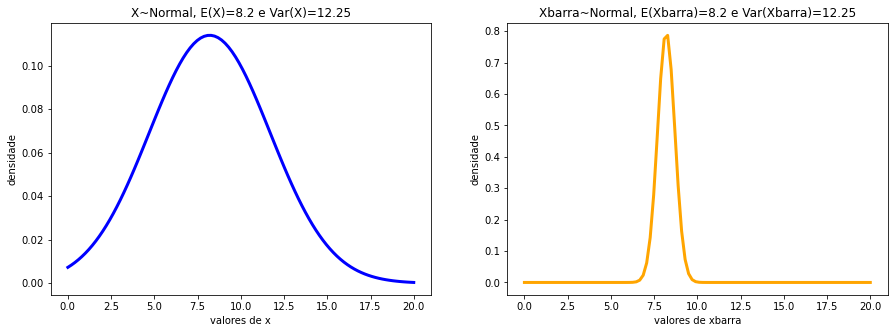

In [7]:
plt.figure(figsize=(15,5))

plt.subplot(121)

eixo_x = np.linspace(0,20,100)
fx = stats.norm.pdf(eixo_x, loc=mu, scale = sigma)

plt.plot(eixo_x, fx, color='blue',lw=3)
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title(f'X~Normal, E(X)={mu} e Var(X)={sigma**2}')

plt.subplot(122)

eixo_x = np.linspace(0,20,100)
fx = stats.norm.pdf(eixo_x, loc=mu, scale = sigma/n**0.5)

plt.plot(eixo_x, fx, color='orange',lw=3)
plt.ylabel('densidade')
plt.xlabel('valores de xbarra')
plt.title(f'Xbarra~Normal, E(Xbarra)={mu} e Var(Xbarra)={sigma**2}')

plt.savefig('fig_exerc_1_itemb.png')

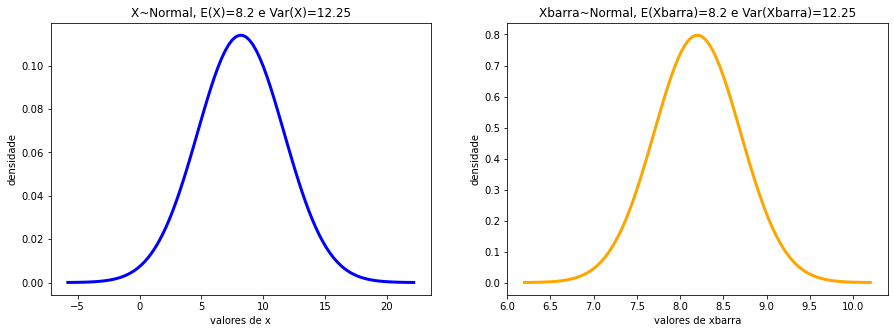

In [8]:
plt.figure(figsize=(15,5))

plt.subplot(121)

eixo_x = np.linspace(mu-sigma*4,mu+sigma*4,100)
fx = stats.norm.pdf(eixo_x, loc=mu, scale = sigma)

plt.plot(eixo_x, fx, color='blue',lw=3)
plt.ylabel('densidade')
plt.xlabel('valores de x')
plt.title(f'X~Normal, E(X)={mu} e Var(X)={sigma**2}')

plt.subplot(122)

eixo_x = np.linspace(mu-sigma/n**0.5*4,mu+sigma/n**0.5*4,100)
fx = stats.norm.pdf(eixo_x, loc=mu, scale = sigma/n**0.5)

plt.plot(eixo_x, fx, color='orange',lw=3)
plt.ylabel('densidade')
plt.xlabel('valores de xbarra')
plt.title(f'Xbarra~Normal, E(Xbarra)={mu} e Var(Xbarra)={sigma**2}')

plt.savefig('fig_exerc_1_itemb.png')

**c)** Assuma que $\mu=8.2$ minutos. Encontre a probabilidade de que o tempo médio de espera na fila seja:
  * Menor do que 10 minutos
  * Entre 8 e 10 minutos
  * Maior do que 9 minutos

In [9]:
# ESCREVA SEU CÓDIGO AQUI

In [10]:
import math
p_menor_10 = stats.norm.cdf(10,loc=mu,scale=sigma/math.sqrt(n)) #a variancia vai ser o quadrado do desvio padrao sobre a raiz de n
p_menor_10

0.9998408914098424

In [11]:
p_menor_8 = stats.norm.cdf(8,loc=mu,scale=sigma/math.sqrt(n))
p_menor_8

0.3445782583896764

In [12]:
entre_8_e_10 = p_menor_10 - p_menor_8
entre_8_e_10

0.6552626330201661

In [13]:
p_maior_9 = 1 -stats.norm.cdf(9,loc=mu,scale=sigma/math.sqrt(n))
p_maior_9

0.054799291699557884

**d)** Assuma que $\mu=8.2$ minutos. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=49$, que contemplam $95\%$ das possíveis médias amostrais mais próximas de $\mu$.

Neste item, consulte o comando `stats.norm.interval()` explicado [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [14]:
# pede o xmaior e o xmenor

In [15]:
x_barra_menor = stats.norm.ppf(0.025,loc=mu, scale=sigma/n**0.5)
x_barra_maior = stats.norm.ppf(0.975,loc=mu, scale=sigma/n**0.5)
f'Com confiança de 95%, estará entre {x_barra_menor} e {x_barra_maior}'

'Com confiança de 95%, estará entre 7.220018007729972 e 9.179981992270026'

In [16]:
x_barra_menor, x_barra_maior = stats.norm.interval(0.95,loc=mu, scale=sigma/n**0.5)
f'Com confiança de 95%, estará entre {x_barra_menor} e {x_barra_maior}'

'Com confiança de 95%, estará entre 7.220018007729973 e 9.179981992270026'

**e)** Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=8.2$ minutos, $n=49$ e coeficiente de confiança igual a $95\%$.

Para tanto, considere a seguinte definição:
  * **Margem de erro:** é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar a média populacional, quando considera 95% das possíveis médias amostrais ($\overline{X}$) mais próximos do verdadeiro valor ($\mu$).

In [17]:
# ESCREVA SEU CÓDIGO AQUI
mu - x_barra_menor,mu - x_barra_maior

(0.9799819922700266, -0.9799819922700266)

**f)** Considerando agora que $\mu$ é desconhecido, obtenha a margem de erro quando $n=49$ e coeficiente de confiança igual a $95\%$.

**Dica:** Aqui será necessário fazer uso da Normal Padrão, porém padronização da média amostral, ou seja, 
$$Z = \frac{\overline{X}-\mu}{\sigma/\sqrt{n}} \sim N(0; 1)$$

In [18]:
# ESCREVA SEU CÓDIGO AQUI

In [19]:
z = stats.norm.ppf(0.975) #z é um valor de uma normal padrao (0,1)

margem = z*sigma/n**0.5
margem

0.9799819922700271

**g)** Qual deveria ser o tamanho da amostra para se ter uma margem de erro de $0.5$ minutos e coeficiente de confiança igual a $95\%$.

In [20]:
# ESCREVA SEU CÓDIGO AQUI

In [21]:
z = stats.norm.ppf(0.975)
margem = 0.5
n = np.ceil((z*sigma/margem)**2)
n

189.0

___

<div id="calcio"></div>

# Concentração de cálcio em águas de lagos

Assuma o interesse em estudar a concentração média de cálcio em águas de lagos de uma determinada região. Considere ainda que o desvio padrão populacional da variável de interesse seja conhecido e igual a 0,10 u.m.

**Responda:** (<a href="#respostas2">Respostas</a>)

**a)** Qual a distribuição de probabilidades da média amostral?

In [22]:
# ESCREVA SUA RESPOSTA AQUI

In [23]:
sigma = 0.10
# Xbarra ~ N(mu, sigma/n**0.5)

**b)** Considerando um coeficiente de confiança igual a 98% e uma amostra de tamanho igual a 100, qual deve ser a margem de erro dessa pesquisa?

In [24]:
# ESCREVA SUA RESPOSTA AQUI

In [25]:
# margem de erro = xbarra - mu
# xbarra = media de uma amostra de 100 elementos
# z = (xbarra - mu)/(sigma/sqrt(n))

n = 100
sigma = 0.10
z = stats.norm.ppf(0.99)
margem_error = (z*sigma)/(n**0.5)
margem_error

0.02326347874040841

**c)** Considerando um coeficiente de confiança igual a 98% e uma margem de erro igual a 0,015 u.m., qual deve ser o tamanho da amostra?

In [26]:
# ESCREVA SUA RESPOSTA AQUI

In [27]:
# margem de erro = (z*sigma)/(n**0.5)
margem_de_erro = 0.015
n = (z*sigma/margem_de_erro)**2
n

240.5286413801929

___
<div id="tomando-decisoes"></div>

# Tomando decisões com uso do TLC

Vamos considerar agora um exemplo (baseado no Exemplo 7-1 Montgomery). 

Um fabricante de componentes eletrônicos afirma que os resistores produzidos por ele possuem uma resistência média de $100 \Omega$ e um desvio padrão de $2 \Omega$. A distribuição da resistência de cada resistor é normal.

Antes de fechar uma grande compra com esse fabricante, considerando seus conhecimentos adquiridos ao longo da graduação no Insper, você decidiu solicitar uma pequena amostra de 25 resistores para realizar um teste de qualidade. O objetivo desta parte da atividade é decidir se você confia ou não na palavra do fabricante.

Considere aqui o valor de $\sigma=2$ teórica não esteja sendo questionado sobre a qualidade do fabricante.

**Responda:**(<a href="#respostas3">Respostas</a>)

**a)** Seja $\overline{X}$ a resistência média de uma amostra com 25 resistores selecionados aleatoriamente. De acordo com o TLC, qual é a distribuição de probabilidades de $\overline{X}$ (qual distribuição e quais os seus respectivos parâmetros)?

In [28]:
# ESCREVA SUA RESPOSTA AQUI

In [43]:
n = 25
mu = 100
sigma = 2
sigma_barra = sigma/n**0.5
sigma_barra
# Xbarra ~ N(mu, sigma**2/n) --> pra escrever a formula tem que usar a variancia, ou sehja, o quadrado do desvio padrao

0.4

In [44]:
var_barra = sigma_barra**2
f'X_barra ~ N({mu}, {var_barra:.2f})'	

'X_barra ~ N(100, 0.16)'

### IMPORTANTE para assumir nos próximos itens:

Assuma que o fabricante afirma que esteja produzindo resistores de acordo com as especificações, ou seja, com $\mu=100 \Omega$.

**b)** Sob a hipótese de que os resistores foram produzidos de acordo com especificação do fabricante, construa um gráfico para visualizar a distribuição de $X$ e um de $\overline{X}$. Explique o que cada uma representa.

In [45]:
# ESCREVA SEU CÓDIGO AQUI

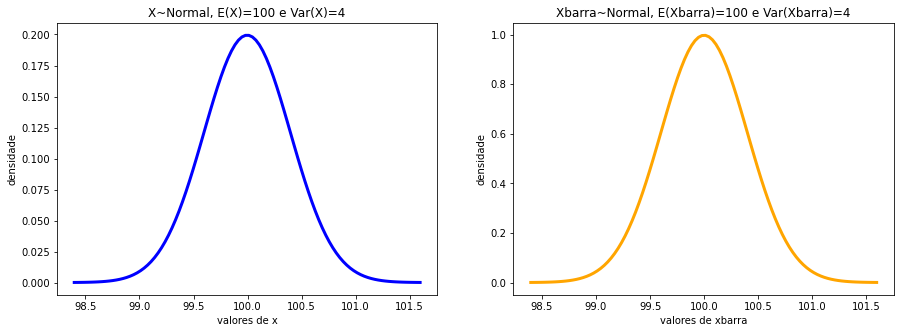

In [46]:
x = np.linspace(mu-4*sigma,mu+4*sigma,100) #cria um vetor de 100 elementos entre 90 e 110
# Para distribuição normal em X ~ N(mu, sigma**2)
fx = stats.norm.pdf(x, loc=mu, scale=sigma) #cria um vetor com a densidade de probabilidade de cada elemento de x
# Para distribuição normal em Xbarra ~ N(mu, sigma**2/n)
fx_barra = stats.norm.pdf(x_barra, loc=mu, scale=sigma_barra) #cria um vetor com a densidade de probabilidade de cada elemento de x
x_barra = x = np.linspace(mu_barra-4*sigma_barra,mu_barra+4*sigma_barra,100) 

# Para os gráficos
figure = plt.figure(figsize=(15,5)) #cria uma figura com tamanho 15x5
plt.subplot(121) #cria um subplot com 1 linha, 2 colunas e o gráfico será o primeiro
plt.plot(x, fx, color='blue',lw=3) #plota o gráfico de x e fx
plt.ylabel('densidade') #nomeia o eixo y
plt.xlabel('valores de x') #nomeia o eixo x
plt.title(f'X~Normal, E(X)={mu} e Var(X)={sigma**2}') #coloca um título no gráfico

plt.subplot(122) #cria um subplot com 1 linha, 2 colunas e o gráfico será o segundo
plt.plot(x_barra, fx_barra, color='orange',lw=3) #plota o gráfico de x e fx_barra
plt.ylabel('densidade') #nomeia o eixo y
plt.xlabel('valores de xbarra') #nomeia o eixo x
plt.title(f'Xbarra~Normal, E(Xbarra)={mu} e Var(Xbarra)={sigma**2}') #coloca um título no gráfico

plt.savefig('fig_exerc_1_itemd.png')
plt.show()

**c)** Sob a hipótese de que os resistores foram produzidos de acordo com especificação do fabricante. Assim, qual deve ser a região de valores de médias amostrais, todas com $n=25$, que contemplam $90\%$ das possíveis médias amostrais mais próximas de $\mu$.
Neste item, consulte o comando `stats.norm.interval()` explicado [aqui](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html).

In [33]:
# ESCREVA SEU CÓDIGO AQUI

In [34]:
mu_barra = pd.Series(np.random.normal(mu, sigma_barra, size=1000)).mean()

In [35]:
n = 25
mu = 100
sigma_barra = sigma/n**0.5
valores = stats.norm.interval(0.90,loc=mu, scale=sigma_barra)
valores

(99.34205854921942, 100.65794145078058)

**d)** Considerando o resultado do item anterior, obtenha a margem de erro quando $\mu=100 \Omega$, $n=25$ e coeficiente de confiança igual a $90\%$.

In [36]:
# ESCREVA SEU CÓDIGO AQUI

In [37]:
# Menor distância entre os valores de xbarra que contenham 90% da área sob a curva
mu-valores[0]

0.6579414507805836

In [38]:
# Maior distância entre os valores de xbarra que contenham 90% da área sob a curva
mu-valores[1]

-0.6579414507805836

**e)** Se uma amostra de 25 resistores é coletada e a média amostral calculada é igual a $\overline{x}=98.929451$. 

Com $90\%$ de confianca, você acredita que essa amostra foi coletada de um população cuja verdadeira média é $\mu=100\Omega$? Ou seja, voce confia no fabricante?

In [39]:
# ESCREVA SEU CÓDIGO AQUI

In [40]:
n = 25
x_barra = 98.929451
alfa = 0.05
z = stats.norm.ppf(alfa, loc = mu, scale = sigma_barra) #z = 1.28
z # Menor média
# Como a média é 98.929451, e a menor média é 99.34, então não há motivos para acreditar na hipótese nula de que a média é 100.


99.34205854921942

<div id="respostas"></div>

---
# Respostas

<a href="#indice">Voltar para o índice</a>

<div id="respostas1"></div>

### Respostas do exercício - Tempo de espera na fila do *check-in*

**item a)** 
$\overline{X}$ ~ Normal($\mu$, 12.25/49) ou, equivalente, $\overline{X}$ ~ Normal($\mu$, 0.25)

**item b)** São gráficos semelhantes a esses:

![](./fig_exerc1_itemb.png)


**item c)** 
* P($\overline{X}$ < 10) = 0.99984
* P(8 < $\overline{X}$ < 10) = 0.65526
* P($\overline{X}$ > 9) = 0.054799


**item d)** A região de 95% das possíveis médias amostrais mais próximas de $\mu$=8.2 vai de: 
7.22002 até 9.17998


**item e)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 95% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.979982
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.979982


**item f)** A margem de erro mantendo $n=49$ e 95% de confiança é 0.979982


**item g)** Tamanho da amostra para margem de erro de 0.5 minuto mantendo 95% de confiança é 189.

<a href="#tempofila">Voltar para enunciado</a>

<div id="respostas2"></div>

### Respostas do exercício - Concentração de cálcio

**item a)** 
$\overline{X}$ ~ Normal($\mu$, 0.01/n)


**item b)** A margem de erro mantendo $n=100$ e 98% de confiança é 0.02326


**item g)** Tamanho da amostra para margem de erro de 0.015 minuto mantendo 98% de confiança é 241.

<a href="#calcio">Voltar para enunciado</a>

___

<div id="respostas3"></div>

### Respostas do exercício - Tomando decisões com TLC

**item a)** Normal(100, 0.16)

**item b)** São gráficos semelhantes a esses:

![](./fig_exerc2_itemb.png)


**item c)** A região de 90% das possíveis médias amostrais mais próximas de mu=100 vai de: 
99.3421 até 100.658

**item d)** 
A margem de erro é o maior erro, para mais ou para menos, que uma média amostral pode ter para estimar $\mu$,
quando considera 90% das possíveis médias amostrais mais próximos do verdadeiro valor ($\mu$).
  * A margem de erro baseada na maior distância aquém de $\mu$ é: -0.657941
  * A margem de erro baseada na maior distância além de $\mu$ é: 0.657941


**item e)** Como xbarra=98.929451 está aquém da menor média, então não há evidências para se confiar na afirmação do fabricante, com 90% de confiança.


<a href="#tomando-decisoes">Voltar para enunciado</a>